# Mini Project 4

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In the lectures we explored how to delta hedge sold call options, resulting in a trading strategy whose profits are neutral to upward or downward drift in a stock path movements, provided the volatility, or $\sigma$, of the stock remained constant.

For this final mini project explore the impact of a non-constant $\sigma$ on the distribution of profits of hedging. You are also encouraged to explore/research a $\sigma$-hedging strategy and write code that simulates the profit distribution of the $\sigma$-hedging strategy. 

Below is some code you can customize that simulates a stock path whose $\sigma$ is not constant.

You are encouraged to use a different model for sigma then the one provided. You can use stock paths simulated by Heston model? You could use a GARCH model for volatility. The choice is yours and you can do your own research to choose how to model a stock movement. 

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def bs_call(S0, K, sigma, T=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

In [3]:
np.random.seed(0)

S0 = 100.0 # initial spot price
T = 1.0
r = 0.039
mu = 0.275
n_paths = 10000
n_steps = 1000
dt = T/n_steps
K = 100.0 # strike price

# $\Delta$ hedging, Heston model

In [4]:
t = 0.0
S = S0
V = 1.0 # sigma**2
d1 = (np.log(S/K) + (r + 0.5*V) * (T-t)) / (np.sqrt(V) * np.sqrt(T-t))
hS = norm.cdf(d1) # delta
cash = bs_call(S0, K, np.sqrt(V), T, r) - hS * S # cash position

for _ in range(n_steps-1):
    V = V + 0.5 * (2.0 - V) * dt + 0.5 * np.sqrt(V) * np.sqrt(dt) * norm.rvs(size = 10000) # update V
    S = S * np.exp((mu - 0.5*V)*dt + np.sqrt(V) * np.sqrt(dt) * norm.rvs(size = 10000)) # update stock
    t = t + dt # update time
    d1 = (np.log(S/K) + (r + 0.5*V) * (T-t)) / (np.sqrt(V) * np.sqrt(T-t))
    cash = cash * np.exp(r * dt) - (norm.cdf(d1) - hS) * S
    hS = norm.cdf(d1)

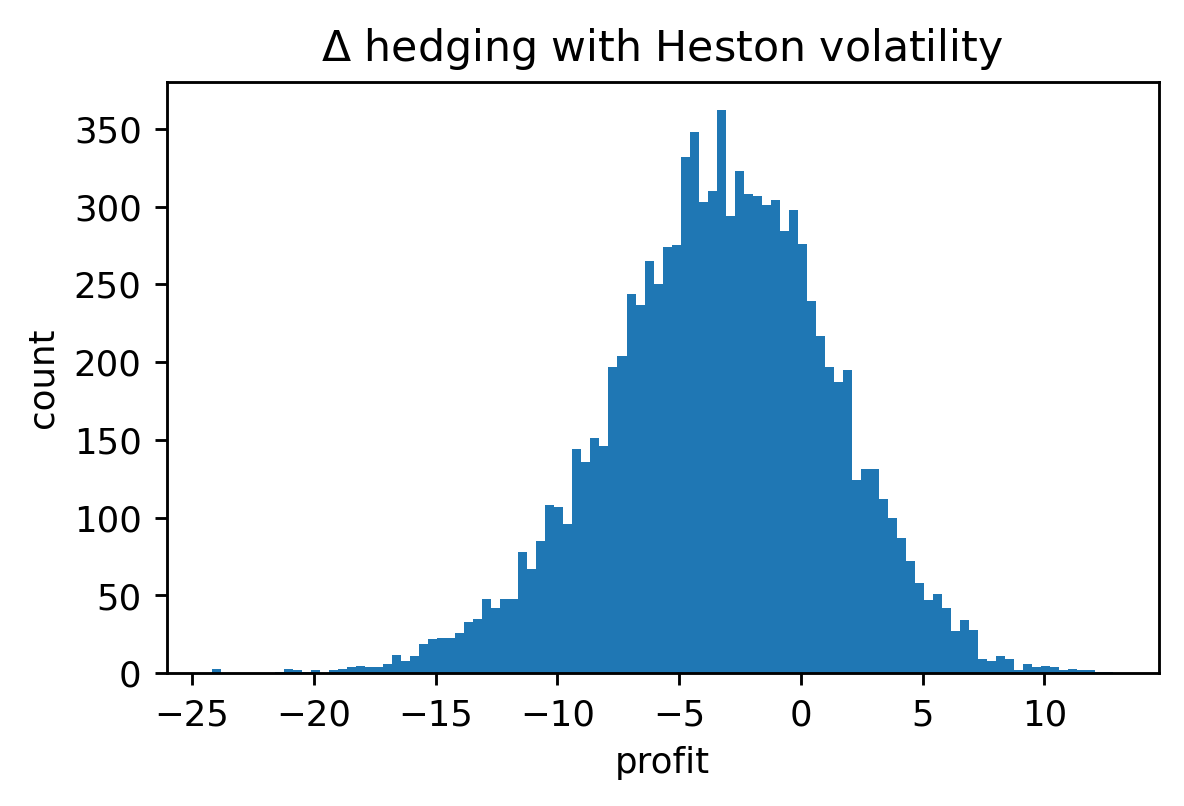

In [5]:
fig, ax = plt.subplots(figsize = (5,3), dpi = 256)

profit_heston_delta_neutral = (cash + hS*S) - np.maximum(S - K,0)
ax.hist(profit_heston_delta_neutral, bins = 100)
ax.set_ylabel('count')
ax.set_xlabel('profit')
ax.set_title(r'$\Delta$ hedging with Heston volatility');
#fig.savefig('fig7.jpeg', transparent = False, bbox_inches = 'tight')

## observations
Not centered at 0. Profits tend to be negative.

# $\Delta$ hedging, trimodal volatility

In [6]:
t = 0.0
S = S0
sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = n_paths)
d1 = (np.log(S/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
hS = norm.cdf(d1)
cash = bs_call(S0, K, sigma, T, r) - hS * S

for _ in range(n_steps-1):
    sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = n_paths)
    S = S * np.exp((mu - 0.5*sigma**2)*dt + sigma * np.sqrt(dt) * norm.rvs(size = n_paths))
    t = t + dt
    d1 = (np.log(S/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    cash = cash * np.exp(r * dt) - (norm.cdf(d1) - hS) * S
    hS = norm.cdf(d1)

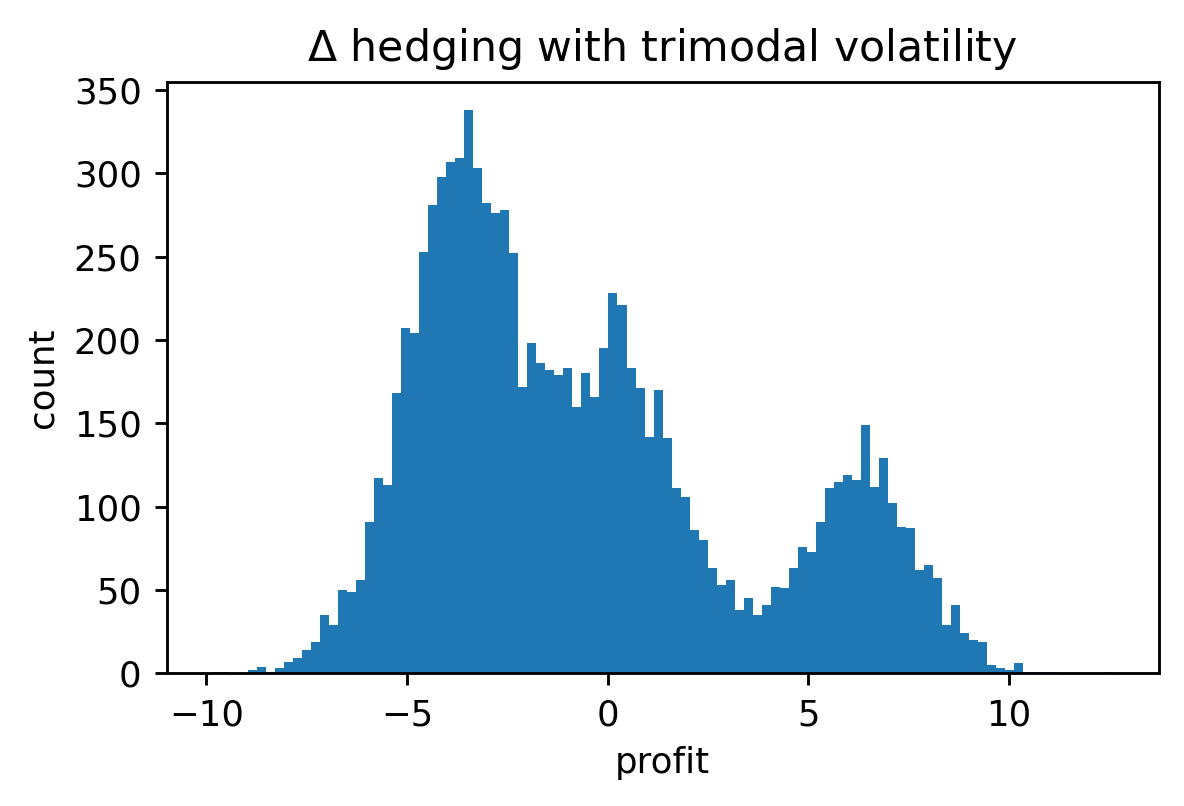

In [7]:
fig, ax = plt.subplots(figsize = (5,3), dpi = 256)

profit_trimodal_delta_neutral = (cash + hS*S) - np.maximum(S - K,0)
ax.hist(profit_trimodal_delta_neutral, bins = 100)
ax.set_ylabel('count')
ax.set_xlabel('profit')
ax.set_title(r'$\Delta$ hedging with trimodal volatility');
#fig.savefig('fig8.jpeg', transparent = False, bbox_inches = 'tight')

## observations
Tri-modal, corresponding to the three values of $\sigma$.

In [8]:
t = 0.0
S = S0
V = 1.0 # sigma**2
d1 = (np.log(S/K) + (r + 0.5*V) * (T-t)) / (np.sqrt(V) * np.sqrt(T-t))
hS = norm.cdf(d1) # delta
cash = bs_call(S0, K, np.sqrt(V), T, r) - hS * S # cash position

for _ in range(n_steps-1):
    V = V + 0.5 * (2.0 - V) * dt + 0.5 * np.sqrt(V) * np.sqrt(dt) * norm.rvs(size = 10000) # update V
    S = S * np.exp((mu - 0.5*V)*dt + np.sqrt(V) * np.sqrt(dt) * norm.rvs(size = 10000)) # update stock
    t = t + dt # update time
    d1 = (np.log(S/K) + (r + 0.5*V) * (T-t)) / (np.sqrt(V) * np.sqrt(T-t))
    new_hS = S * norm.pdf(d1) * np.sqrt(T-t)
    cash = cash * np.exp(r * dt) - (new_hS - hS) * S
    hS = new_hS

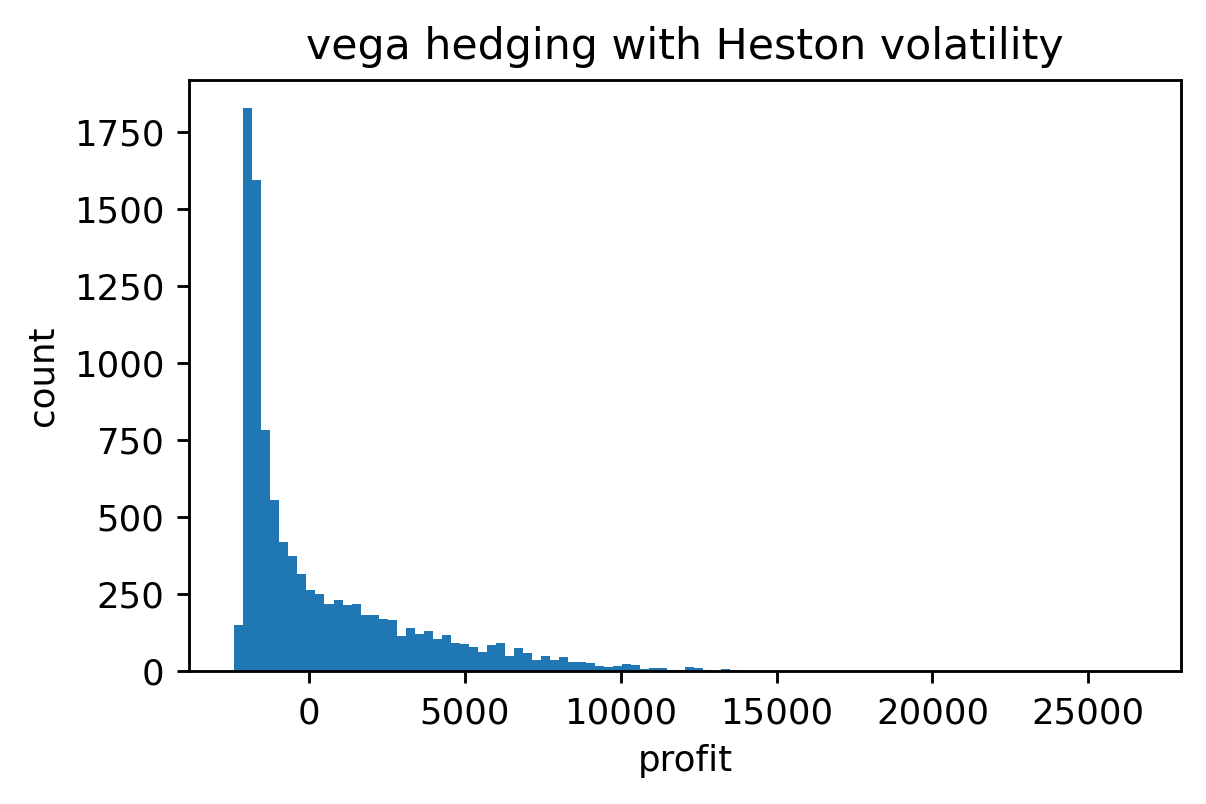

In [9]:
fig, ax = plt.subplots(figsize = (5,3), dpi = 256)

profit_heston_vega_neutral = (cash + hS*S) - np.maximum(S - K,0)
ax.hist(profit_heston_vega_neutral, bins = 100)
ax.set_ylabel('count')
ax.set_xlabel('profit')
ax.set_title(r'vega hedging with Heston volatility');
#fig.savefig('fig9.jpeg', transparent = False, bbox_inches = 'tight')

## observations
Looks somewhat log-normal. Heavily right skewed.